# RDWT

Code contributed by Abhayjit Singh Gulati (211IT085)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import cv2

In [2]:
def rdwt(img):

    # Performing the Redundant Discrete Wavelet Transform (RDWT) with Haar wavelet
    coeffs_org = pywt.swt2(img, 'haar', level=1, axes=(0, 1))

    # Extracting the coefficients at each level
    A1, (B1, C1, D1) = coeffs_org[0]

    #Plotting the coefficients
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    axs[0, 0].imshow(A1, cmap='gray'), axs[0, 0].set_title('A1 (LL)')
    axs[0, 1].imshow(B1, cmap='gray'), axs[0, 1].set_title('B1 (LH)')
    axs[1, 0].imshow(C1, cmap='gray'), axs[1, 0].set_title('C1 (HL)')
    axs[1, 1].imshow(D1, cmap='gray'), axs[1, 1].set_title('D1 (HH)')

    # # Adjust layout to prevent clipping
    # plt.tight_layout()

    # # Showing the plots
    # plt.show()

    return A1, B1, C1, D1

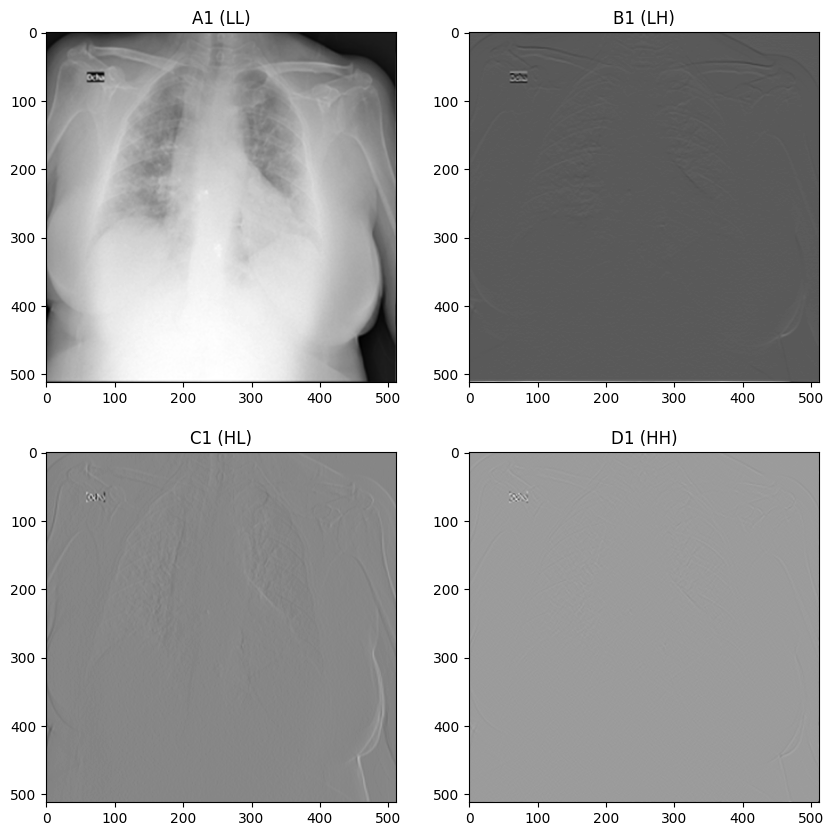

In [3]:
img = cv2.imread('assets/input_image_rdwt.png', 0)

A1, B1, C1, D1 = rdwt(img)

# Saving the generated images as one image
A2 = np.concatenate((A1, B1), axis=1)
C2 = np.concatenate((C1, D1), axis=1)
A2 = np.concatenate((A2, C2), axis=0)

cv2.imwrite('generated_assets/image_rdwt.png', A2)

In [ ]:
def irdwt(coefficients, wavelet='haar'):
    # Inverse wavelet transform
    irdwt_result = pywt.idwt(coefficients[0], coefficients[1], wavelet, axis=-1)
    return irdwt_result

In [ ]:
combined_coeffs = [A1, B1, C1, D1]
mark_img = irdwt(combined_coeffs)

mark_img_resized = cv2.resize(mark_img, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)

# Display the original and the resized reconstructed image
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(mark_img_resized, cmap='gray')
axs[1].set_title('Reconstructed Image')


plt.savefig('generated_assets/irdwt.png')
# Adjust layout to prevent clipping
# plt.tight_layout()
# plt.show()